Formato: TIFF, Tamanho: (512, 512), Modo: L


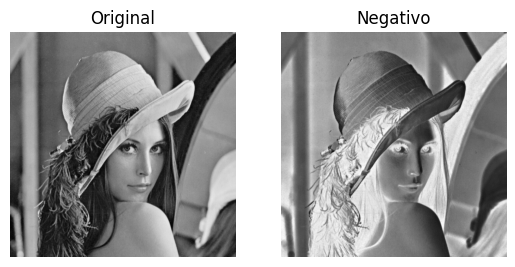

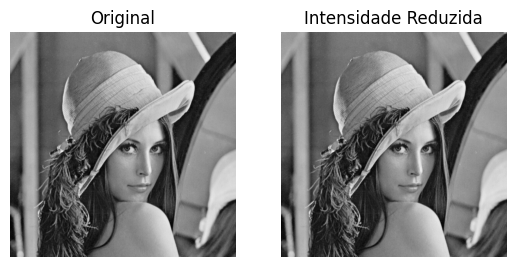

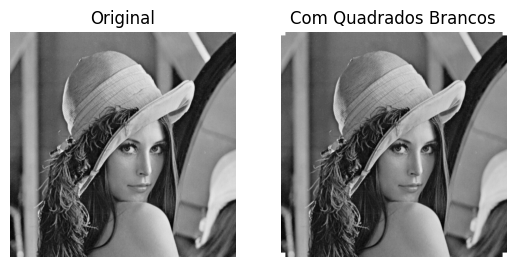

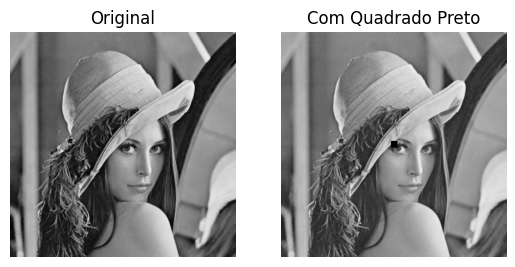

Formato: TIFF, Tamanho: (512, 512), Modo: L


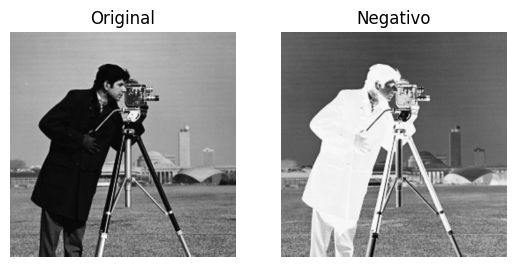

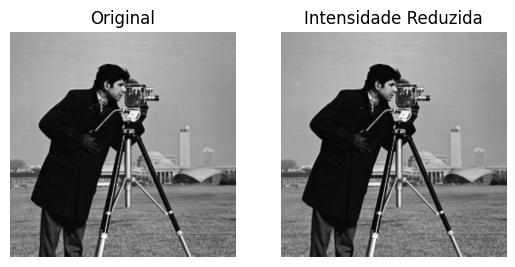

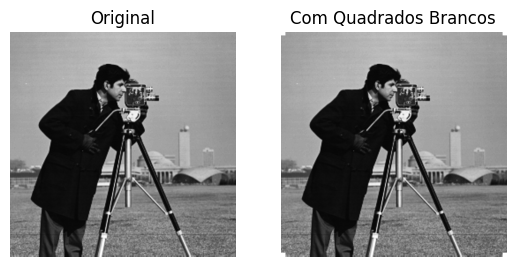

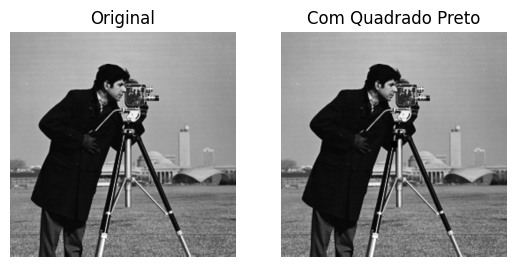

Formato: TIFF, Tamanho: (600, 600), Modo: L


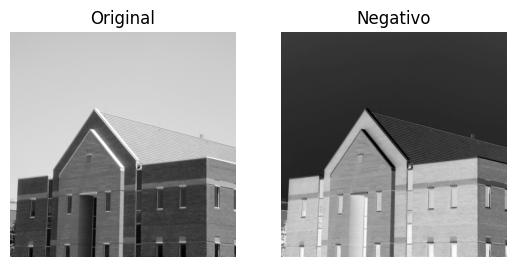

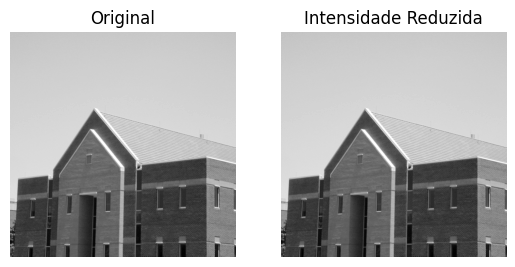

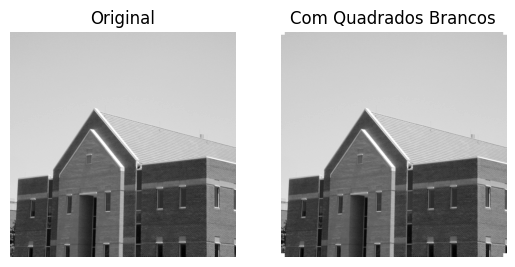

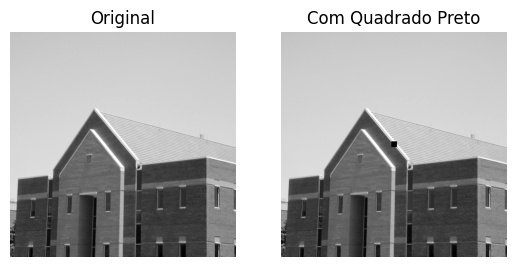

In [37]:
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter
from scipy.ndimage import uniform_filter
import cv2

def abrir_imagem(caminho):
    img = Image.open(caminho)
    print(f"Formato: {img.format}, Tamanho: {img.size}, Modo: {img.mode}")
    return img, np.array(img)

def plotar_imagem(img_original, img_filtrada, titulo_original, titulo_filtrada):
    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].imshow(img_original, cmap='gray')
    ax[0].set_title(titulo_original)
    ax[0].axis('off')
    ax[1].imshow(img_filtrada, cmap='gray')
    ax[1].set_title(titulo_filtrada)
    ax[1].axis('off')
    plt.show()

# 1. Calcular o negativo das imagens;
def filtro_negativo(image):
    return 255 - image

# 2. Diminuir pela metade a intensidade dos pixels;
def reduzir_intensidade(image):
    return (image / 2).astype(int)

# 3. Incluir 4 quadrados brancos 10 x 10 pixels em cada canto das imagens;
def adicionar_quadrados_brancos(image):
    img_edit = image.copy()
    a, l = img_edit.shape # altura x largura

    img_edit[0:10, 0:10] = 255
    img_edit[0:10, l-10:l] = 255
    img_edit[a-10:a, 0:10] = 255
    img_edit[a-10:a, l-10:l] = 255

    return img_edit

# 4. Incluir 1 quadrado preto 15X15 no centro das imagens
def adicionar_quadrado_preto(image):
    img_edit = image.copy()
    size = img_edit.shape[0]
    centro = size // 2
    img_edit[centro-7:centro+8, centro-7:centro+8] = 0

    return img_edit

def main():
    imagens = ['lena_gray_512.tif', 'cameraman.tif', 'house.tif']

    for caminho in imagens:
        img_original, img_cv = abrir_imagem(caminho)

        img_negativa = filtro_negativo(img_cv)
        img_reduzida = reduzir_intensidade(img_cv)
        img_brancos = adicionar_quadrados_brancos(img_cv)
        img_preto = adicionar_quadrado_preto(img_cv)

        plotar_imagem(img_original, img_negativa, "Original", "Negativo")
        plotar_imagem(img_original, img_reduzida, "Original", "Intensidade Reduzida")
        plotar_imagem(img_original, img_brancos, "Original", "Com Quadrados Brancos")
        plotar_imagem(img_original, img_preto, "Original", "Com Quadrado Preto")

if __name__ == "__main__":
    main()
